## STEP 0 - SETUP ENVIRONMENT

#### Import NLTK and important datasets needed for TOKENIZATION

In [17]:
import nltk
import sys
import subprocess

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to C:\Users\Amit
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Amit
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Amit
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#### IMPORT all libraries without error

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import streamlit as st

print("All libraries imported successfully!!")


All libraries imported successfully!!


## PART 1 - Data Collection

In [19]:
# load the csv file
df = pd.read_csv("UpdatedResumeDataSet.csv")

# Now will run basic dataset check
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns)
print("\nMissing Values\n", df.isnull().sum())
print("\nUnique Categories:", df['Category'].nunique())
print("\nUnique List:\n", df['Category'].unique())

Dataset Shape: (962, 2)

Column Names: Index(['Category', 'Resume'], dtype='object')

Missing Values
 Category    0
Resume      0
dtype: int64

Unique Categories: 25

Unique List:
 ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


## PART 2 - Data Preprocessing (Text + Labels)

In [20]:
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [21]:
#set of english stopwords
stop_words = set(stopwords.words('english'))

# TEXT CLEANING function
def clean_text(text):
    text = text.lower() #lowercase
    text = re.sub(r'<[^>]+>', ' ', text) #remove html tags
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text) #remove links
    text = text.translate(str.maketrans('', '', string.punctuation)) #removes punct
    text = re.sub(r'\s+', ' ', text).strip() #removes whitespaces
    tokens = nltk.word_tokenize(text) #tokenizes text, very important for NLP
    tokens = [word for word in tokens if word not in stop_words] #loops and adds only words not stopwords
    return " ".join(tokens)


# Apply cleaning function to all resumes
df['Cleaned_Resume'] = df['Resume'].apply(clean_text)

# Show sample cleaned text
df[['Resume', 'Cleaned_Resume']].head(2)


,Resume,Cleaned_Resume
0,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 uitrgpv da...


In [22]:
## ENCODE Job titles as Numbers for ML model
label_encoder = LabelEncoder()
df['Category_Code'] = label_encoder.fit_transform(df['Category'])

# Map encoded labels to their Category names
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Label Mapping:\n", label_map)

Label Mapping:
 {'Advocate': np.int64(0), 'Arts': np.int64(1), 'Automation Testing': np.int64(2), 'Blockchain': np.int64(3), 'Business Analyst': np.int64(4), 'Civil Engineer': np.int64(5), 'Data Science': np.int64(6), 'Database': np.int64(7), 'DevOps Engineer': np.int64(8), 'DotNet Developer': np.int64(9), 'ETL Developer': np.int64(10), 'Electrical Engineering': np.int64(11), 'HR': np.int64(12), 'Hadoop': np.int64(13), 'Health and fitness': np.int64(14), 'Java Developer': np.int64(15), 'Mechanical Engineer': np.int64(16), 'Network Security Engineer': np.int64(17), 'Operations Manager': np.int64(18), 'PMO': np.int64(19), 'Python Developer': np.int64(20), 'SAP Developer': np.int64(21), 'Sales': np.int64(22), 'Testing': np.int64(23), 'Web Designing': np.int64(24)}


In [23]:
## SPLIT the data into training and testing sets

X = df['Cleaned_Resume']
y = df['Category_Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training Samples:", len(X_train))
print("Testing Samples:", len(X_test))

Training Samples: 769
Testing Samples: 193


## Part 3 - FEATURE ENGINEERING(Text Vectorization)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_train_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X_train_df.head()

,01,01 engineering,07,07 08,10,10 days,10 months,10 monthscompany,10 nos,10g,...,year project,years,years experience,york,yrs,zaggle,zaggle prepaid,zensar,zensar technologies,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.02571,0.031523,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#get some features names
features = tfidf_vectorizer.get_feature_names_out()
print("Top 10 Feautres:", features[:10])

Top 10 Feautres: ['01' '01 engineering' '07' '07 08' '10' '10 days' '10 months'
 '10 monthscompany' '10 nos' '10g']


## PART 4 - MODEL BUILDING

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model and train it
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=200)

In [27]:
# Test the model
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9948

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       1.00      1.00      

In [28]:
# INSPECT Model Results - Job categories model struggled with

inaccurate_preds = pd.DataFrame({'True_Label': y_test, 'Predicted_Label': y_pred, 'Resume': X_test})
inaccurate_preds = inaccurate_preds[inaccurate_preds['True_Label'] != inaccurate_preds['Predicted_Label']]
print(inaccurate_preds.head())

     True_Label  Predicted_Label  \
605           8                2   

                                                Resume  
605  technical skills â¢ hp alm rtc jira â¢ as400...  


## PART 5 - Hyperparameter Tuning to find best parameters

In [29]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga']
}

# Initialize the gridsearchcv with logistic regression model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_tfidf, y_train)

print("Best hyperparams:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparams: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy: 0.9974008998054474


C:\Users\Amit Kumar\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [30]:
# Evaluating the best Model

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_tfidf)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Best model accuracy: {accuracy_best:.4f}")
print("\nBest model classification report:\n", classification_report(y_test, y_pred_best))

Best model accuracy: 0.9948

Best model classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16     

## PART 6 - Model Evaluation based on various Metrics

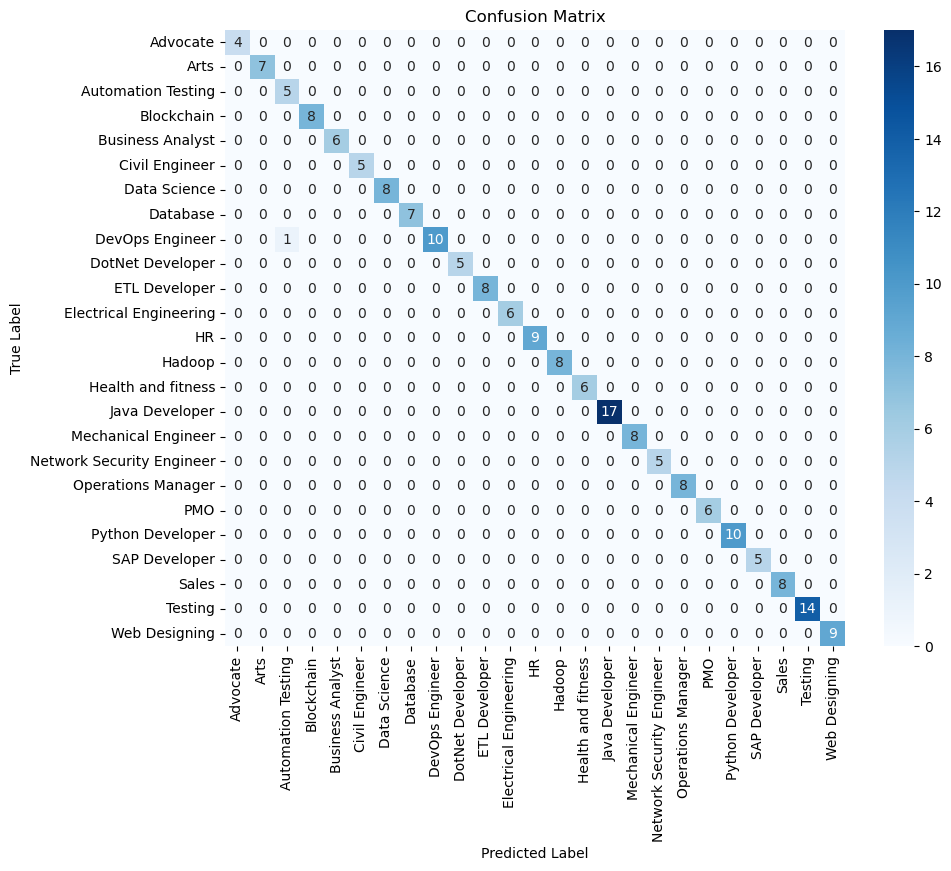

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, y_pred_best)

#Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [32]:
# Print accuracy of the final model
print(f"Final Model Accuracy: {accuracy_best:.4f}")

Final Model Accuracy: 0.9948


#### SAVE THE FINAL MODEL

In [33]:
import joblib

joblib.dump(best_model, "job_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("model and vectorizer saved successfully!")

model and vectorizer saved successfully!


## PART 7 - Build the Web App for deployement

In [34]:

import streamlit as st
import joblib

model = joblib.load("job_model.pkl")
tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# Streamlit UI
st.title("Job title prediction from Resume")
st.write("Enter a resume text below and get the predicted job title.")

# Input box for entering resume text
resume_text = st.text_area("Resume Text")

# Prediction Button
if st.button("Predict"):
    if resume_text:
        resume_tfidf = tfidf_vectorizer.transform([resume_text])
        prediction = model.predict(resume_tfidf)
        predicted_title = label_encoder.inverse_transform(prediction)[0]
        st.write(f"Predicted Job Title best for you: {predicted_title}")
    else:
        st.write("Please enter text in the resume input box")



2025-07-11 16:05:50.027 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:05:50.709 
  command:

    streamlit run C:\Users\Amit Kumar\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-11 16:05:50.710 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:05:50.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:05:50.712 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:05:50.715 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:05:50.716 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:05:50.717 Thread 'MainThread